In [22]:
import torch
from torchvision import models
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import os

In [23]:
# load images to list
catList = []
directory = "cat/"
for cat in range(10):
    filepath = os.path.join(directory, "katze" + str(cat) + ".jfif")
    img = Image.open(filepath)
    catList.append(img)

In [24]:
# process imgs
preprocess = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224), transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
batchList = []
for catImg in catList:
    img_t = preprocess(catImg)
    batch_t = torch.unsqueeze(img_t, 0)
    batchList.append(batch_t)

In [25]:
# load nn
resnet = models.resnet101(pretrained=True)
alexnet = models.alexnet(pretrained=True)

In [26]:
# resnet
rCatList = []
rPList = []
for batch_t in batchList:
    resnet.eval()
    out = resnet(batch_t)
    with open('imagenet_classes.txt') as file:
        labels = [line.strip() for line in file.readlines()]
    _, index = torch.max(out, 1)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    _, indices = torch.sort(out, descending=True)
    result = [(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]
    print(result[0])
    catBreed = result[0][0]
    p = result[0][1]
    p = round(p, 2)
    rCatList.append(catBreed)
    rPList.append(p)

('Persian cat', 53.59147644042969)
('tabby, tabby cat', 29.476308822631836)
('Siamese cat, Siamese', 96.2871322631836)
('tiger cat', 35.95954895019531)
('tabby, tabby cat', 42.35285949707031)
('tabby, tabby cat', 71.82915496826172)
('tabby, tabby cat', 75.78350067138672)
('Egyptian cat', 50.668113708496094)
('lynx, catamount', 31.861989974975586)
('tabby, tabby cat', 69.99362182617188)


In [27]:
# alexnet
aCatList = []
aPList = []
for batch_t in batchList:
    alexnet.eval()
    out = alexnet(batch_t)
    with open('imagenet_classes.txt') as file:
        labels = [line.strip() for line in file.readlines()]
    _, index = torch.max(out, 1)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    _, indices = torch.sort(out, descending=True)
    result = [(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]
    print(result[0])
    catBreed = result[0][0]
    p = result[0][1]
    p = round(p, 2)
    aCatList.append(catBreed)
    aPList.append(p)

('papillon', 26.61929702758789)
('lynx, catamount', 76.9433822631836)
('Siamese cat, Siamese', 63.48845291137695)
('tiger cat', 20.642013549804688)
('lynx, catamount', 40.980140686035156)
('tabby, tabby cat', 57.417213439941406)
('tabby, tabby cat', 59.75495147705078)
('Egyptian cat', 26.22939109802246)
('grey fox, gray fox, Urocyon cinereoargenteus', 24.85687255859375)
('tabby, tabby cat', 77.109619140625)


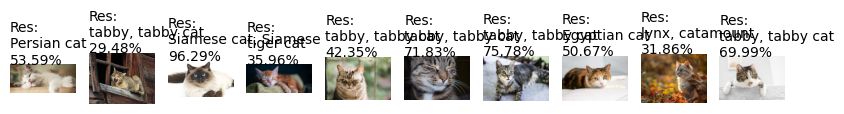

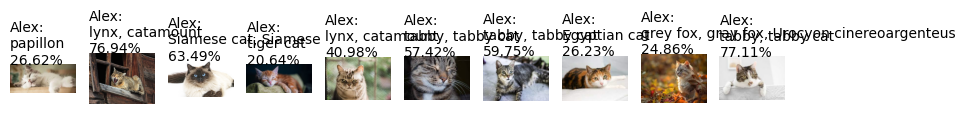

In [28]:
# plot
fig, axes = plt.subplots(1, 10, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    if i < len(catList):
        ax.imshow(catList[i])
        ax.text(0.05, -0.2, ("Res:\n{}\n{}%".format(rCatList[i], rPList[i], ha='center')))
        ax.axis("off")
plt.show()
fig, axes = plt.subplots(1, 10, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    if i < len(catList):
        ax.imshow(catList[i])
        ax.text(0.05, -0.2, ("Alex:\n{}\n{}%".format(aCatList[i], aPList[i], ha='center')))
        ax.axis("off")
plt.show()